In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In [2]:
storedata = pd.read_csv("Walmart_Store_sales.csv")

In [44]:
storedata

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012-05-10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012-12-10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19


In [45]:
storedata.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


In [4]:
storedata.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
storedata.shape

(6435, 8)

In [6]:
storedata.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
storedata.corr()

/tmp/ipykernel_235/1242414401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  storedata.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [9]:
#Which store has maximum sales
max_sales = storedata.groupby('Store')['Weekly_Sales'].sum()
max_sales.idxmax()

20

<AxesSubplot: xlabel='Store', ylabel='Weekly_Sales'>

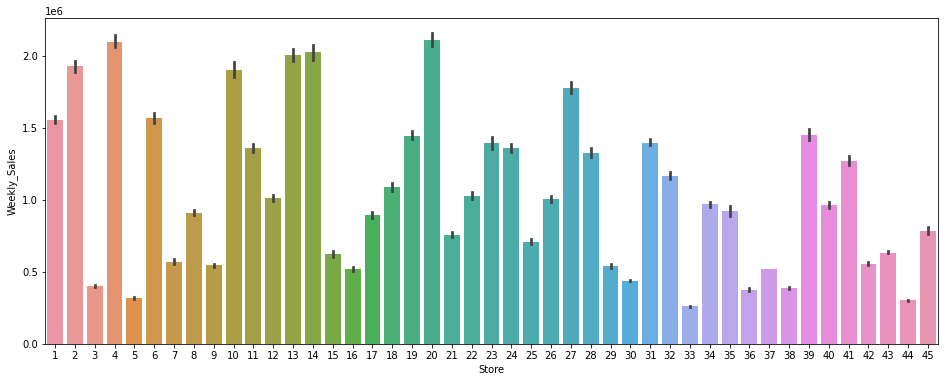

In [10]:
#Plotting Which store has maximum sales with Bar Chart
plt.figure(figsize=(16,6))
sns.barplot(x=storedata.Store,y=storedata.Weekly_Sales)

In [11]:
#Maximum Standard Deviation
max_std = storedata.groupby('Store')['Weekly_Sales'].std()
max_std.idxmax()

14

In [12]:
#Maximum Coefficient of Variation
max_cov = ((storedata.groupby('Store')['Weekly_Sales'].std()/(storedata.groupby('Store')['Weekly_Sales'].mean()))*100)
max_cov.idxmax()

35

In [13]:
walmart_data_std = storedata.groupby('Store').agg({'Weekly_Sales':['mean','std']})
walmart_data_std.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

In [14]:
#Grouping Data By Year & Month
growth = storedata.copy()
growth['Date'] = pd.to_datetime(growth.Date,format = '%d-%m-%Y')
growth['Year'] = growth['Date'].dt.year
growth['Month'] = growth['Date'].dt.month
growth

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [15]:
#Group data with year = 2012
growth_rate = growth.groupby('Year')
growth_rate_2012 = growth_rate.get_group(2012)
growth_rate_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,2


In [16]:
growth_rate_2012 = storedata[(pd.to_datetime(storedata['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(storedata['Date']) <= pd.to_datetime('09-30-2012'))]
growth_rate_2012 = growth_rate_2012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} Has Good Quartely Growth In Q3'2012 {}".format(growth_rate.idxmax(),growth_rate.max()))

Store Number       Store  Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price   CPI  \
Year                                                                           
2010   6292    47          1905             1         4599        2049  1184   
2011   6340    99           527            53         4657        2068  1243   
2012   6392   142          2830           105         4707        1427  1286   

      Unemployment  Month  
Year                       
2010          1607     43  
2011          1621     95  
2012          1673    139   Has Good Quartely Growth In Q3'2012       Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Year                                                                          
2010     45 2010-12-31    3818686.45             1       100.14       3.336   
2011     45 2011-12-30    3676388.98             1        99.66       4.211   
2012     45 2012-10-26    2565259.92             1       100.07       4.468   

             C

/tmp/ipykernel_235/986712457.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  growth_rate_2012 = storedata[(pd.to_datetime(storedata['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(storedata['Date']) <= pd.to_datetime('09-30-2012'))]
/tmp/ipykernel_235/986712457.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  growth_rate_2012 = storedata[(pd.to_datetime(storedata['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(storedata['Date']) <= pd.to_datetime('09-30-2012'))]


In [17]:
#Stores Holiday Sales
stores_holiday_sales = storedata[storedata['Holiday_Flag'] == 1]

In [18]:
#Stores Weekday Sales
stores_nonholiday_sales = storedata[storedata['Holiday_Flag'] == 0]

In [ ]:
#Store Sales In Superbowl Day
#Super Bowl: 12 February 2010, 11 February 2011, 10 February 2012 & 08 February 2013
stores_holiday_sales_superBowl = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-02-2010'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('11-02-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-02-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('08-02-2023'))]                                                                                                                                

In [ ]:
#Stores Sales In Labour Day
#Labour Day: 10 September 2010, 09 September 2011, 07 September 2012 & 06 September 2013
stores_holiday_sales_labourDay = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-09-2010'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('09-09-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('07-09-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('06-09-2023'))]

In [ ]:
#Stores Sales in Thanks Giving
#Thanksgiving: 26 November 2010, 25 November 2011, 23 November 2011 & 29 November 2013
stores_holiday_sales_thanksgiving = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('26-11-2010'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('25-11-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('23-11-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('29-11-2023'))]

In [ ]:
#Stores Sales in Christmas
#Christmas: 31 December 2010, 30 December 2011, 28 December 2012 & 27 December 2013
stores_holiday_sales_Christmas = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('31-12-2010'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('30-12-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('28-12-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('27-12-2023'))]

In [23]:
stores_nonholiday_sales_mean = stores_nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()

In [24]:
stores_holiday_sales_sum = stores_holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()

In [25]:
for row in stores_holiday_sales_sum.itertuples():
    for row1 in stores_nonholiday_sales_mean.itertuples():
        if row.Weekly_Sales > row1.Weekly_Sales:
            print("On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales :- {}".format(row.Date,row.Weekly_Sales))
            break;

On this Date 07-09-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48330059.31
On this Date 09-09-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46763227.53
On this Date 10-02-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :- 50009407.92
On this Date 10-09-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 45634397.839999996
On this Date 11-02-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 47336192.79
On this Date 12-02-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48336677.63
On this Date 25-11-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 66593605.26
On this Date 26-11-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 65821003.24
On this Date 30-12-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46042461.04
On this Date 31-12-2010 Holiday Sales is greater than Non Holiday Sales and the Sale

In [26]:
print("Super Bowl Day Sale",stores_holiday_sales_superBowl['Weekly_Sales'].sum())
print("Labour Day Sale",stores_holiday_sales_labourDay['Weekly_Sales'].sum())
print("Thanksgiving Day Sale",stores_holiday_sales_thanksgiving['Weekly_Sales'].sum())
print("Christmas Day Sale",stores_holiday_sales_Christmas['Weekly_Sales'].sum())

Super Bowl Day Sale 145682278.34
Labour Day Sale 140727684.68
Thanksgiving Day Sale 132414608.5
Christmas Day Sale 86474980.03999999


In [27]:
x_features_object = storedata[storedata['Store'] == 1][['Store','Date']]
date_obj = storedata[storedata['Store'] == 1][['Date']]
date_obj.index +=1
x_features_object.Date = date_obj.index
x_features_object.head()

,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [28]:
y_target = storedata[storedata['Store'] == 1]['Weekly_Sales']
y_target.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_features_object,y_target,random_state=1)

In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
feature_dataset = storedata[storedata['Store']==1][['Store','CPI','Unemployment','Fuel_Price']]
feature_dataset.head()

,Store,CPI,Unemployment,Fuel_Price
0,1,211.096358,8.106,2.572
1,1,211.242170,8.106,2.548
2,1,211.289143,8.106,2.514
3,1,211.319643,8.106,2.561
4,1,211.350143,8.106,2.625


In [31]:
response_set_cpi = storedata[storedata['Store']==1]['CPI'].astype('int64')
response_set_unemployment = storedata[storedata['Store']==1]['Unemployment'].astype('int64')

In [32]:
from sklearn.model_selection import  train_test_split
x_train_cpi,x_test_cpi,y_train_cpi,y_test_cpi = train_test_split(feature_dataset,response_set_cpi,random_state=1)
x_train_unemp,x_test_unemp,y_train_unemp,y_test_unemp = train_test_split(feature_dataset,response_set_unemployment,random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train_cpi,y_train_cpi)
y_pred = logreg.predict(x_test_cpi)
logreg.fit(x_train_unemp,y_train_unemp)

LogisticRegression(max_iter=10000)

In [34]:
y_pred_unemp = logreg.predict(x_test_unemp)

In [35]:
from sklearn import metrics
print(metrics.accuracy_score(y_test_cpi,y_pred))
print(metrics.accuracy_score(y_test_unemp,y_pred_unemp))

0.7222222222222222
0.9444444444444444


In [36]:
print('CPI actual :',y_test_cpi.values[0:30])
print('CPI predicted :',y_pred[0:30])
print('Actual Unemployment :',y_test_unemp.values[0:30])
print('Predicted Unemployment :',y_pred_unemp[0:30])

CPI actual : [215 221 211 211 221 211 210 211 215 217 221 212 216 218 211 210 211 217
 215 211 212 217 221 219 214 211 211 219 215 219]
CPI predicted : [215 221 211 211 221 211 211 211 215 215 221 211 215 218 211 211 211 217
 215 211 211 217 221 220 215 211 211 221 215 220]
Actual Unemployment : [7 7 7 8 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Predicted Unemployment : [7 7 7 7 6 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [43]:
storedata['Day'] = pd.to_datetime(storedata['Date'])
storedata.head()

/tmp/ipykernel_235/398302857.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  storedata['Day'] = pd.to_datetime(storedata['Date'])


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03
